In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# 定义一个目标函数
def target_function(x):
    return x*x+0.5*x+5

In [41]:
# ReLU激活函数及其导数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 前向传播
def forward_pass(X, params):
    W1, b1, W2, b2 = params
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  
    return Z1, A1, Z2, A2

# 损失函数（均方误差）
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 反向传播
def backward_pass(X, y, Z1, A1, Z2, A2, params):
    W1, b1, W2, b2 = params
    m = X.shape[0]
    
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0) / m
    
    return dW1, db1, dW2, db2


In [42]:
# 参数更新
def update_params(params, grads, learning_rate):
    W1, b1, W2, b2 = params
    dW1, db1, dW2, db2 = grads
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2

In [43]:
# 训练过程
def train(X_train, y_train, X_test, y_test, hidden_units, epochs, learning_rate):
    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]
    
    # 初始化权重和偏置
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    
    params = W1, b1, W2, b2
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        # 前向传播
        _, _, _, A2_train = forward_pass(X_train, params)
        _, _, _, A2_test = forward_pass(X_test, params)
        
        # 计算损失
        train_loss = mse_loss(y_train, A2_train)
        test_loss = mse_loss(y_test, A2_test)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # 反向传播和参数更新
        Z1, A1, Z2, A2 = forward_pass(X_train, params)
        grads = backward_pass(X_train, y_train, Z1, A1, Z2, A2, params)
        params = update_params(params, grads, learning_rate)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return params, train_losses, test_losses


In [44]:
# 数据采样
np.random.seed(42)
X = np.linspace(-10, 10, 500).reshape(-1, 1)
y = target_function(X)

# 划分训练集和测试集
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 训练神经网络
hidden_units = 20
epochs = 1000
learning_rate = 0.005

params, train_losses, test_losses = train(X_train, y_train, X_test, y_test, hidden_units, epochs, learning_rate)


Epoch 0, Train Loss: 1496.9605, Test Loss: 5933.3877
Epoch 100, Train Loss: 43.4082, Test Loss: 876.7092
Epoch 200, Train Loss: 57.6520, Test Loss: 809.0497
Epoch 300, Train Loss: 24.5888, Test Loss: 774.5049
Epoch 400, Train Loss: 35.3361, Test Loss: 750.2835
Epoch 500, Train Loss: 26.0643, Test Loss: 733.7624
Epoch 600, Train Loss: 25.9883, Test Loss: 719.4117
Epoch 700, Train Loss: 28.0639, Test Loss: 704.9590
Epoch 800, Train Loss: 27.0527, Test Loss: 688.7969
Epoch 900, Train Loss: 25.6945, Test Loss: 672.5250


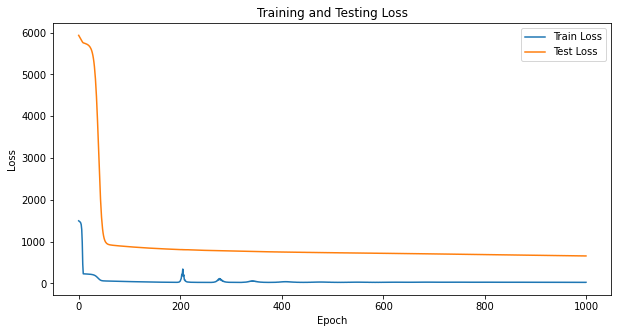

In [45]:
# 绘制训练和测试损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Testing Loss")
plt.show()

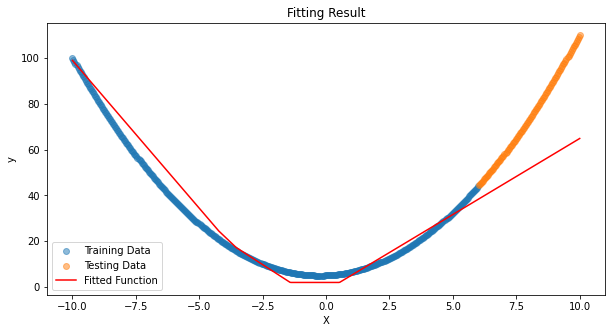

In [46]:
# 绘制拟合效果
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label="Training Data", alpha=0.5)
plt.scatter(X_test, y_test, label="Testing Data", alpha=0.5)
plt.plot(X, forward_pass(X, params)[-1], label="Fitted Function", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Fitting Result")
plt.show()